In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!ls -l '/content/drive/My Drive/Colab Notebooks/datasets/dogs_and_cats_small.zip'

-rw------- 1 root root 90618980 Mar 24 04:25 '/content/drive/My Drive/Colab Notebooks/datasets/dogs_and_cats_small.zip'


In [3]:
!unzip /content/drive/My\ Drive/Colab\ Notebooks/datasets/dogs_and_cats_small.zip

Archive:  /content/drive/My Drive/Colab Notebooks/datasets/dogs_and_cats_small.zip
  inflating: test/cats/cat.1501.jpg  
  inflating: test/cats/cat.1502.jpg  
  inflating: test/cats/cat.1503.jpg  
  inflating: test/cats/cat.1504.jpg  
  inflating: test/cats/cat.1505.jpg  
  inflating: test/cats/cat.1506.jpg  
  inflating: test/cats/cat.1507.jpg  
  inflating: test/cats/cat.1508.jpg  
  inflating: test/cats/cat.1509.jpg  
  inflating: test/cats/cat.1510.jpg  
  inflating: test/cats/cat.1511.jpg  
  inflating: test/cats/cat.1512.jpg  
  inflating: test/cats/cat.1513.jpg  
  inflating: test/cats/cat.1514.jpg  
  inflating: test/cats/cat.1515.jpg  
  inflating: test/cats/cat.1516.jpg  
  inflating: test/cats/cat.1517.jpg  
  inflating: test/cats/cat.1518.jpg  
  inflating: test/cats/cat.1519.jpg  
  inflating: test/cats/cat.1520.jpg  
  inflating: test/cats/cat.1521.jpg  
  inflating: test/cats/cat.1522.jpg  
  inflating: test/cats/cat.1523.jpg  
  inflating: test/cats/cat.1524.jpg  
  inf

In [4]:
!ls -l

total 20
drwx------ 5 root root 4096 Apr  1 07:26 drive
drwxr-xr-x 1 root root 4096 Mar 25 13:38 sample_data
drwxr-xr-x 4 root root 4096 Apr  1 07:26 test
drwxr-xr-x 4 root root 4096 Apr  1 07:26 train
drwxr-xr-x 4 root root 4096 Apr  1 07:26 validation


In [5]:
train_dir = 'train'
valid_dir = 'validation'
test_dir='test'

In [6]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255, rotation_range = 40, width_shift_range = 0.2, height_shift_range = 0.2, shear_range = 0.2, 
                             zoom_range = 0.2, horizontal_flip = True, vertical_flip = True, fill_mode = 'nearest')
valid_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150,150), batch_size=200, class_mode ='binary')
valid_generator = valid_datagen.flow_from_directory(valid_dir, target_size=(150,150), batch_size=200, class_mode='binary')
test_generator = test_datagen.flow_from_directory(test_dir, target_size=(150,150), batch_size=200, class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [10]:
from keras import layers, models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.summary()

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)      

In [11]:
%%time

Hist = model.fit(train_generator, steps_per_epoch=10, epochs=100, validation_data = valid_generator, validation_steps=5)

Epoch 1/100
10/10 [==============================] - 17s 2s/step - loss: 0.8347 - accuracy: 0.5131 - val_loss: 0.6924 - val_accuracy: 0.5000
Epoch 2/100
10/10 [==============================] - 16s 2s/step - loss: 0.6920 - accuracy: 0.5038 - val_loss: 0.6863 - val_accuracy: 0.5020
Epoch 3/100
10/10 [==============================] - 16s 2s/step - loss: 0.6898 - accuracy: 0.5076 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/100
10/10 [==============================] - 16s 2s/step - loss: 0.6933 - accuracy: 0.4917 - val_loss: 0.6924 - val_accuracy: 0.5000
Epoch 5/100
10/10 [==============================] - 16s 2s/step - loss: 0.6924 - accuracy: 0.4941 - val_loss: 0.6897 - val_accuracy: 0.5000
Epoch 6/100
10/10 [==============================] - 16s 2s/step - loss: 0.6895 - accuracy: 0.5167 - val_loss: 0.6870 - val_accuracy: 0.5550
Epoch 7/100
10/10 [==============================] - 16s 2s/step - loss: 0.6908 - accuracy: 0.5463 - val_loss: 0.6924 - val_accuracy: 0.5090
Epoch 8/100
1

In [12]:
loss, accuracy = model.evaluate(test_generator, steps=5)
loss, accuracy

5/5 [==============================] - 3s 500ms/step - loss: 0.5293 - accuracy: 0.7640


(0.5293304324150085, 0.7639999985694885)

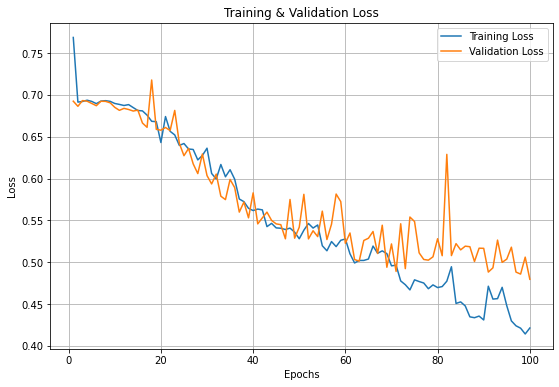

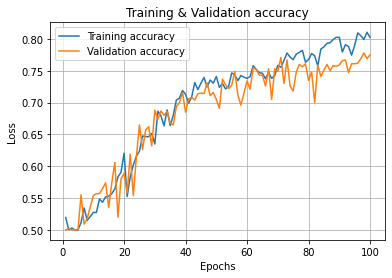

In [14]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist.history['loss']) + 1)
plt.figure(figsize = (9, 6))
plt.plot(epochs, Hist.history['loss'])
plt.plot(epochs, Hist.history['val_loss'])
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()
plt.show()

plt.plot(epochs, Hist.history['accuracy'])
plt.plot(epochs, Hist.history['val_accuracy'])
plt.title('Training & Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training accuracy', 'Validation accuracy'])
plt.grid()
plt.show()